## EJERCICIO 2

Muestre la ejecución de los dos algoritmos con un ejemplo de grafo (ingreso por consola o por archivo). Asuma la aplicación de BFS y DFS en casos de uso reales (por ejemplo: las salidas de evacuación en un campus universitario) y describa el caso de ejemplo o definición del problema y la demo del algoritmo. Debería desplegarse el resultado para:
- BFS: la ruta más corta de nodo Start al nodo Finish
- DFS: la ruta más profunda de nodo Start al nodo Finish

## DESCRIPCIÓN DEL PROBLEMA REAL

La Escuela Politécnica Nacional (EPN) está ubicada en la ciudad de Quito, en una zona considerada vulnerable. En caso de una erupción volcánica del Pichincha o del Cotopaxi, es fundamental que todos los miembros de la comunidad politécnica identifiquen rutas de evacuación seguras y eficientes desde la EPN hacia las zonas seguras cercanas.

## DEFINICIÓN DEL GRAFO

Se va a modelar las rutas de evacuación utilizando los algorítmos: 
**BFS (Breadth-First Search)** se empleará para encontrar la ruta más corta desde EPN a un lugar seguro y 
**DFS (Depth-First Search)** se utilizará para explorar todas las posibles conexiones antes de llegar a una zona segura.
Los **nodos** representan los lugares reales que actúan como zonas seguras cercanas a la EPN,  el nodo de inicio es la EPN, mientras que el nodo final será seleccionado por el usuario mediante la entrada por consola, y las **aristas** representan las rutas de conexión.

## IMPLEMENTACIÓN DEL CÓDIGO

In [1]:
from collections import deque

class Node:
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return self.name

class Graph:
    def __init__(self):
        self.nodes = {}
        self.adj_list = {}

    def add_node(self, node):
        self.nodes[node.name] = node
        self.adj_list[node] = []

    def add_edge(self, node1, node2):
        self.adj_list[node1].append(node2)
        self.adj_list[node2].append(node1)  # Grafo no dirigido

    #*** BFS ***
    def bfs(self, start_node, finish_node):
        visited = {node.name: False for node in self.nodes.values()}
        queue = deque([(start_node, [start_node])])
        visited[start_node.name] = True

        while queue:
            current, path = queue.popleft()
            if current == finish_node:
                return path
            for neighbor in self.adj_list[current]:
                if not visited[neighbor.name]:
                    visited[neighbor.name] = True
                    queue.append((neighbor, path + [neighbor]))
        return None

    #*** DFS ***
    def dfs(self, start_node, finish_node):
        visited = {node.name: False for node in self.nodes.values()}
        stack = [(start_node, [start_node])]

        while stack:
            current, path = stack.pop()
            if current == finish_node:
                return path
            if not visited[current.name]:
                visited[current.name] = True
                for neighbor in self.adj_list[current]:
                    if not visited[neighbor.name]:
                        stack.append((neighbor, path + [neighbor]))
        return None

## Creación del Grafo, Nodos y Aristas

In [2]:
# Crear el grafo
graph = Graph()

# Crear los nodos
nodos = {
    "EPN": Node("Escuela Politécnica Nacional"),
    "Coliseo Rumiñahui": Node("Coliseo Rumiñahui"),
    "Parque El Arbolito": Node("Parque El Arbolito"),
    "Parque El Ejido": Node("Parque El Ejido"),
    "Parque Alameda": Node("Parque Alameda"),
    "Plaza Indoamérica": Node("Plaza Indoamérica"),
    "UCE": Node("Universidad Central del Ecuador"),
    "Parque Carolina": Node("Parque Carolina")
}

# Añadir nodos al grafo
for nodo in nodos.values():
    graph.add_node(nodo)

# Conexiones (aristas)
graph.add_edge(nodos["EPN"], nodos["Coliseo Rumiñahui"])
graph.add_edge(nodos["EPN"], nodos["Parque El Arbolito"])
graph.add_edge(nodos["EPN"], nodos["Parque Alameda"])
graph.add_edge(nodos["Coliseo Rumiñahui"], nodos["Parque El Ejido"])
graph.add_edge(nodos["Parque El Arbolito"], nodos["Parque Alameda"])
graph.add_edge(nodos["Parque El Arbolito"], nodos["Parque El Ejido"])
graph.add_edge(nodos["Parque El Ejido"], nodos["Plaza Indoamérica"])
graph.add_edge(nodos["Parque El Ejido"], nodos["UCE"])
graph.add_edge(nodos["UCE"], nodos["Parque Carolina"])

print("*** Nodos disponibles: ***")
for name in nodos:
    print("-", name)

*** Nodos disponibles: ***
- EPN
- Coliseo Rumiñahui
- Parque El Arbolito
- Parque El Ejido
- Parque Alameda
- Plaza Indoamérica
- UCE
- Parque Carolina


## Datos de entrada por consola

In [3]:
start_name = "EPN"
finish_name = input("Ingrese nodo de destino: ").strip()

if start_name not in nodos or finish_name not in nodos:
    print("❌ Nodo no válido.")
else:
    start_node = nodos[start_name]
    finish_node = nodos[finish_name]

Ingrese nodo de destino:  Parque Carolina


## Ejecución del Algoritmo BFS y DFS

In [4]:
    bfs_path = graph.bfs(start_node, finish_node)
    print("\n **Resultados: **")
    print("🟢BFS Ruta más corta:", " → ".join(node.name for node in bfs_path) 
          if bfs_path else "No encontrada")


 **Resultados: **
🟢BFS Ruta más corta: Escuela Politécnica Nacional → Coliseo Rumiñahui → Parque El Ejido → Universidad Central del Ecuador → Parque Carolina


In [5]:
    dfs_path = graph.dfs(start_node, finish_node)
    print("🔴DFS Ruta más profunda:", " → ".join(node.name for node in dfs_path) 
          if dfs_path else "No encontrada")

🔴DFS Ruta más profunda: Escuela Politécnica Nacional → Parque Alameda → Parque El Arbolito → Parque El Ejido → Universidad Central del Ecuador → Parque Carolina


## Visualización del Grafo de rutas de evacuación

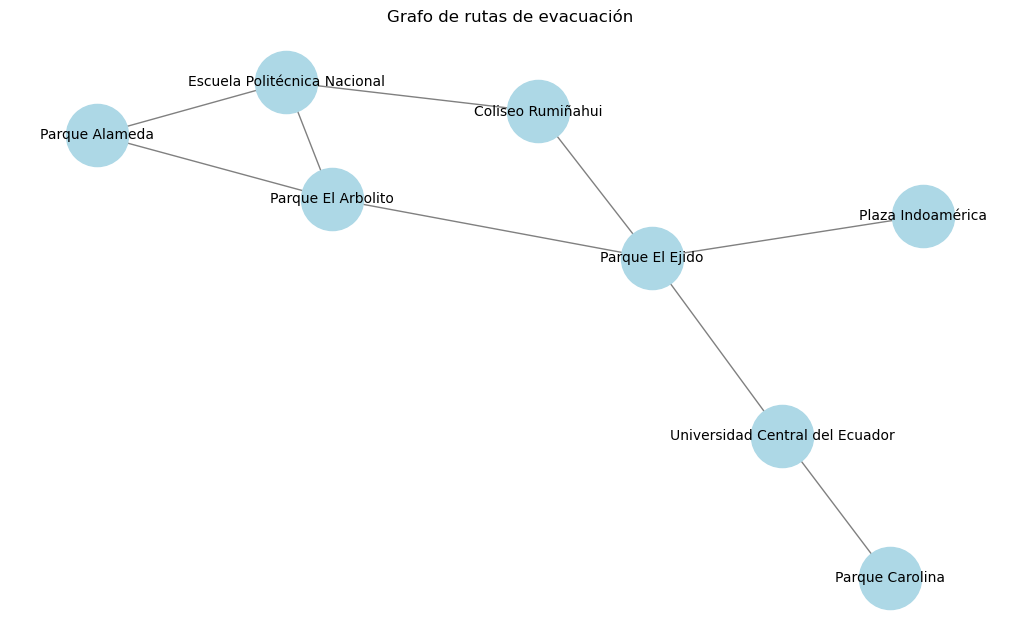

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def dibujar_ruta(graph, path=None, titulo="Grafo"):
    G = nx.Graph()
    for node, vecinos in graph.adj_list.items():
        for vecino in vecinos:
            G.add_edge(node.name, vecino.name)

    edge_colors = []
    path_edges = list(zip([n.name for n in path[:-1]], [n.name for n in path[1:]])) if path else []

    for u, v in G.edges():
        if (u, v) in path_edges or (v, u) in path_edges:
            edge_colors.append("red")
        else:
            edge_colors.append("gray")

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color=edge_colors,
            node_size=2000, font_size=10)
    plt.title(titulo)
    plt.show()

# Muestra el grafo de rutas de evacuación
dibujar_ruta(graph, titulo="Grafo de rutas de evacuación")

## Resultados de las Rutas BFS y DFS

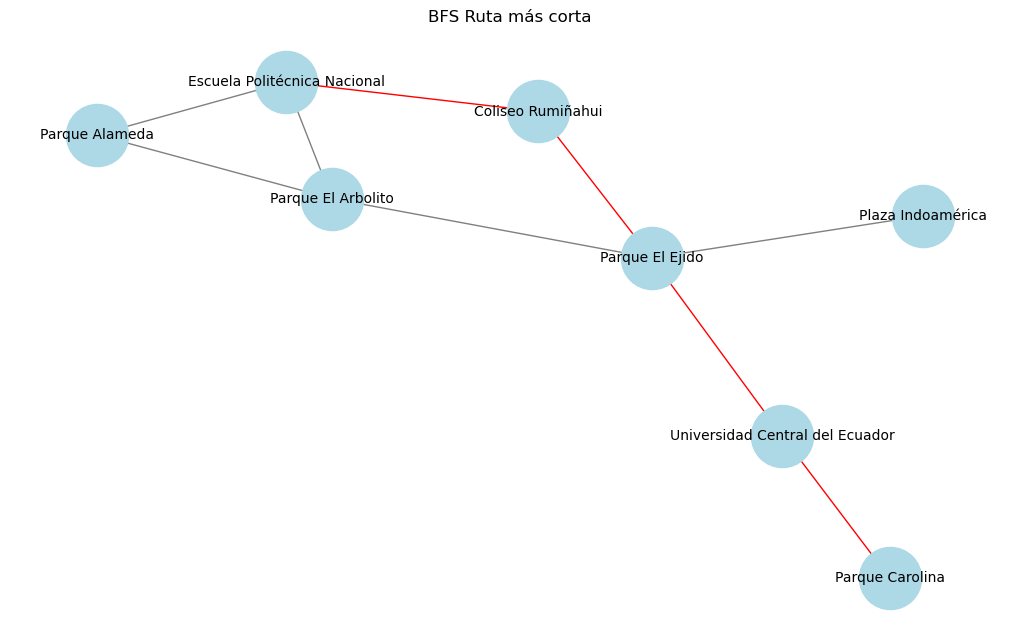

In [7]:
# Muestra el BFS
if bfs_path:
    dibujar_ruta(graph, path=bfs_path, titulo="BFS Ruta más corta")

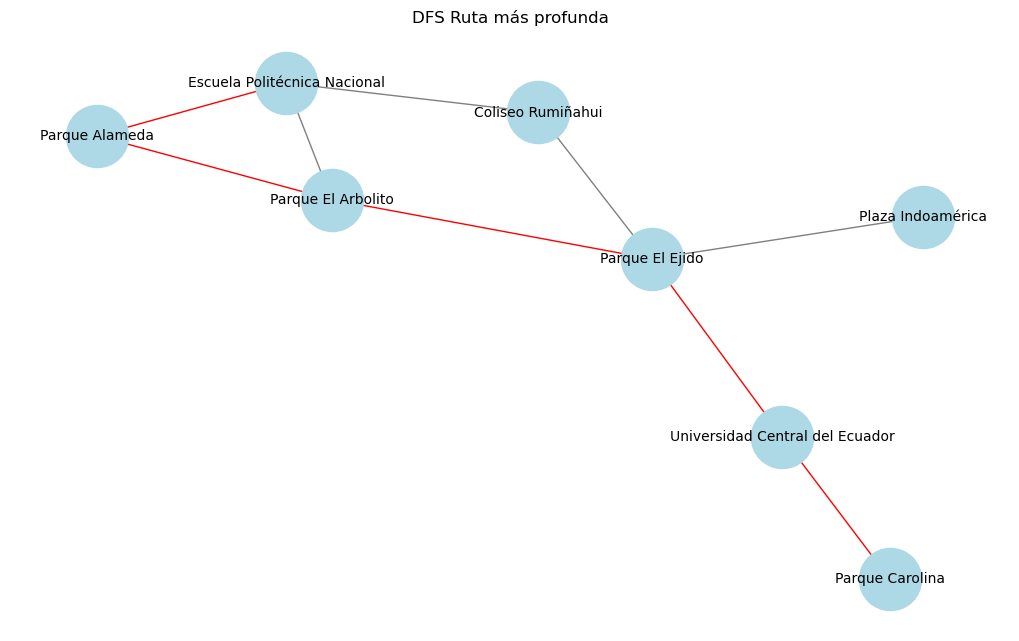

In [8]:
# Muestra el DFS
if dfs_path:
    dibujar_ruta(graph, path=dfs_path, titulo="DFS Ruta más profunda")